In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 4 elections data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5749,Mymensingh-8,1991,JaPa,Khurram Khan Chowdhury,18209.0,24.68,yes
5805,Barguna-2,1991,Independent,Nurul Islam Moni,19616.0,28.41,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes


In [7]:
dfcwin.shape

(1150, 7)

In [8]:
# only take candidates from BNP and AL
dfcwin = dfcwin[dfcwin.party.isin(mainp)]
dfcwin.head()

,seat,year,party,name,votes,votes_pc,winner
5411,Noakhali-3,1991,BNP,Salah Uddin Kamran,11378.0,22.23,yes
5860,Kurigram-3,1991,AL,Md. Amjad Hossain Talukdar,20547.0,23.74,yes
5896,Noakhali-1,1991,BNP,Zainul Abdin Farroque,21418.0,31.97,yes
5927,Barisal-4,1991,AL,Mohiuddin Ahmed,22093.0,30.22,yes
5961,Sylhet-4,1991,AL,Imran Ahmad,23018.0,42.76,yes


In [9]:
dfcwin.shape

(962, 7)

In [10]:
dfs = pd.read_csv('data/seat_summary.csv')
dfs.head()

,seat,year,turnout,turnout_pc,voters
0,Panchagarh-1,2024,192579.0,44.08,436923.0
1,Panchagarh-1,2018,320597.0,84.54,379207.0
2,Panchagarh-1,2014,86046.0,26.16,328959.0
3,Panchagarh-1,2008,266812.0,91.70,291095.0
4,Panchagarh-1,2001,206827.0,86.15,240073.0


In [13]:
# merge two datasets to get turnout % for specific seat and year
df = pd.merge(dfcwin, dfs, on=['seat', 'year'], how='inner')[['seat', 'year', 'party', 'turnout_pc']]
df.head(10)

,seat,year,party,turnout_pc
0,Noakhali-3,1991,BNP,38.0
1,Kurigram-3,1991,AL,43.5
2,Noakhali-1,1991,BNP,33.2
3,Barisal-4,1991,AL,37.7
4,Sylhet-4,1991,AL,35.0
5,Barisal-3,1991,BNP,37.7
6,Sylhet-4,1996,BNP,61.9
7,Mymensingh-6,1991,BNP,43.0
8,Lakshmipur-1,1991,BNP,37.6
9,Comilla-11,1991,BNP,38.3


In [14]:
df = df.sort_values(by=['turnout_pc'], ascending=False)
df.head(10)

,seat,year,party,turnout_pc
819,Mymensingh-1,2008,AL,95.6
730,Rajshahi-5,2008,AL,94.6
844,Naogaon-2,2008,AL,94.4
738,Cox's Bazar-3,2008,BNP,94.4
705,Jhenaidah-3,2008,AL,94.2
586,Brahmanbaria-1,2008,AL,94.1
891,Naogaon-3,2008,AL,94.0
852,Jessore-2,2008,AL,93.7
746,Natore-3,2008,AL,93.5
712,Jessore-5,2008,AL,93.3


In [15]:
df.to_csv('dataout/mainp_turnout_distn.csv', index=False)

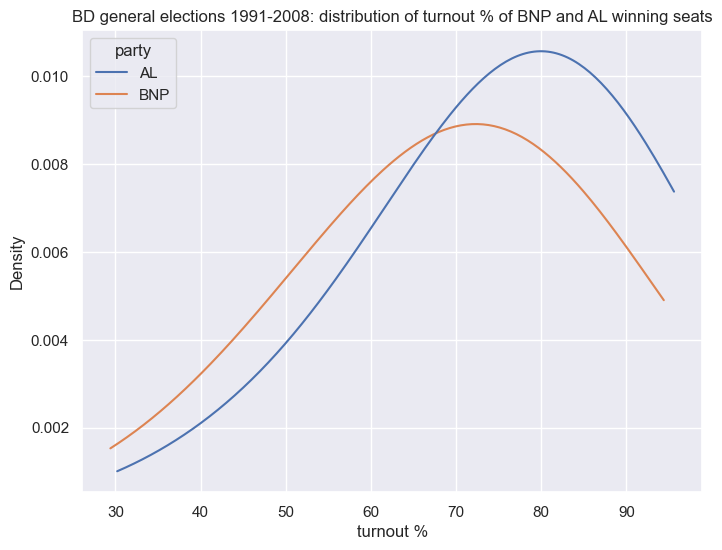

In [20]:
# plot kernel density to visualize the distribution of turnout % of AL and BNP winning seats
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=df, x="turnout_pc", hue="party", bw_adjust=4, cut=0, ax=ax)
ax.set_title('BD general elections 1991-2008: distribution of turnout % of BNP and AL winning seats')
ax.set_xlabel('turnout %')
fig.savefig('fig/mainp_turnout_distn',bbox_inches='tight')

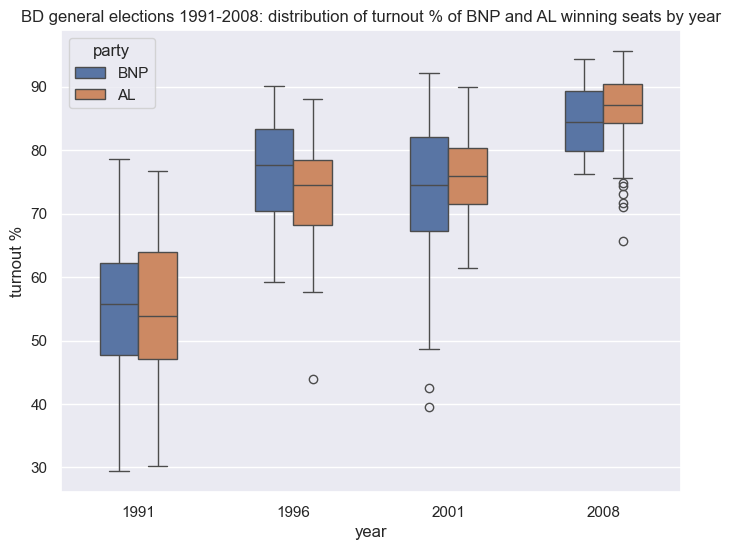

In [21]:
# plot distribution of turnout % of AL and BNP winning seats each year
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x="year", y="turnout_pc", hue="party", width=.5, ax=ax)
ax.set_title('BD general elections 1991-2008: distribution of turnout % of BNP and AL winning seats by year')
ax.set_ylabel('turnout %')
fig.savefig('fig/mainp_turnout_year_distn',bbox_inches='tight')
